<a href="https://colab.research.google.com/github/gtanish2003/Diabetic-Retinopathy-Prediction/blob/main/DR_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile

# Define the path to the uploaded zip file
zip_file_path = '/content/Diabetes.zip'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/Diabetes')

# Verify the directory structure
!ls -R /content/Diabetes

/content/Diabetes:
Diabetes  DR  No_DR

/content/Diabetes/Diabetes:
DR  No_DR

/content/Diabetes/Diabetes/DR:
000c1434d8d7_png.rf.620970d7d209700b4cf09b8f36f52ff9.jpg
001639a390f0_png.rf.26308ef1c5feed76a5dd7d3de5fabe15.jpg
0024cdab0c1e_png.rf.c429c451f3406b66d0b469a2942b4615.jpg
0083ee8054ee_png.rf.1490d8387b7078fa60b8e4dfee77e4a5.jpg
00a8624548a9_png.rf.a43d6bd8144eee1785a4aef237d972c1.jpg
00e4ddff966a_png.rf.8e3ea3cd2daff968042fd8c10a503f51.jpg
0124dffecf29_png.rf.418f87264731840166f8d797be7c415f.jpg
01b3aed3ed4c_png.rf.1aa06508fe5801d0d4e47f06a811c299.jpg
0243404e8a00_png.rf.472eaba5f8b3091f20f944781b04a0f4.jpg
025a169a0bb0_png.rf.ba9b3c7d14d339081975bcb69b2f98a4.jpg
026dcd9af143_png.rf.53d41fc39fcdc99bd5467f503942e8b7.jpg
033f2b43de6d_png.rf.66f0c8fa263b5c19c975944509c7e60f.jpg
034cb07a550f_png.rf.b0114fabd8ad49a3a7545cdf7bf982a9.jpg
0369f3efe69b_png.rf.cc6b9b0f1797af69d35dd8545538ce57.jpg
03a7f4a5786f_png.rf.78e75525c31ea1a39b0e99f1507de68a.jpg
03c85870824c_png.rf.9fc6aa0e81f300d

In [ ]:
# Check the contents of the nested Plant_Disease folders
!ls -R /content/Diabetes
!ls -R /content/Diabetes/Diabetes

# Move the contents of the nested Plant_Disease folder to the parent Plant_Disease folder
!mv /content/Diabetes/Diabetes/* /content/Diabetes/

# Remove the now-empty nested Plant_Disease folder
!rm -r /content/Diabetes/Diabetes

# Verify the final structure
!ls -R /content/Diabetes

Streaming output truncated to the last 5000 lines.
40c24aded50c_png.rf.603e11cf3a88cfda6aef90253adbfb5c.jpg
41345cec5957_png.rf.6b7d17e72d3ad251a0ff13e9db91242b.jpg
4134b290f5f3_png.rf.ff33978f56dc63af002bc8e3b21325c7.jpg
4158c340fa49_png.rf.7a840cb6373250d23f4a1e1baf0614b6.jpg
41960d5f58c2_png.rf.22838a1441560e265e0c6ebaecc70c31.jpg
4210809074c1_png.rf.75a522fa68f04694272768dfcfb22f3e.jpg
4276b82e4489_png.rf.c24b41a680672b9b1ae25b60d0bfc1da.jpg
42c65af5ab16_png.rf.3d005b6f895d535a5b35af6919642922.jpg
4318b6adeb97_png.rf.0280c143e5d261670464827cace6fc67.jpg
4350a1b2f3cb_png.rf.c1f2bfa22603366c662e23319343e0a5.jpg
435414ccccf7_png.rf.23dcbe1b56c64c1a74f237fbff18319d.jpg
436e7a7af761_png.rf.c7263a1a6a2fe2ce5d97ba0ed4610db6.jpg
43bc7c066dfb_png.rf.58456167fd55b5ab9fc9260275dc7658.jpg
43f22d1be8dd_png.rf.72c607237b6771de40121a66db108cc6.jpg
4409965eb2a4_png.rf.4d6caa20058887def9b03682dcebd96e.jpg
441848e0f308_png.rf.4220ef307b93e9f280d9db19dec29e42.jpg
44271f3cb18f_png.rf.3b0abe50de3855527

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import zipfile

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


Displaying images from dr folder:


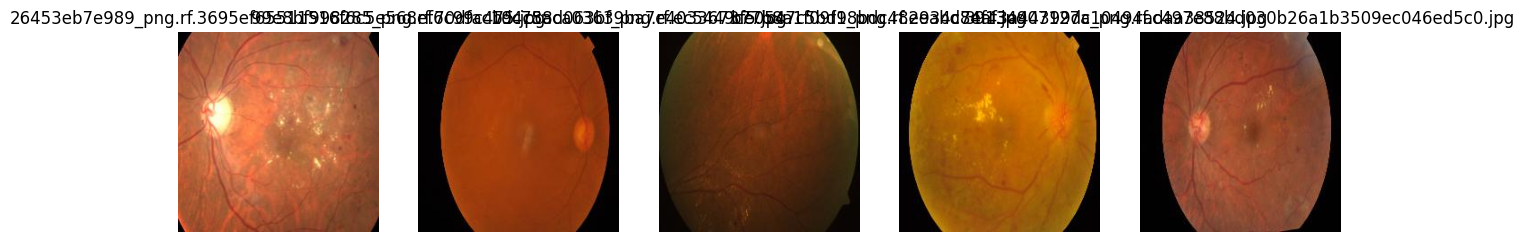

Displaying images from no_dr folder:


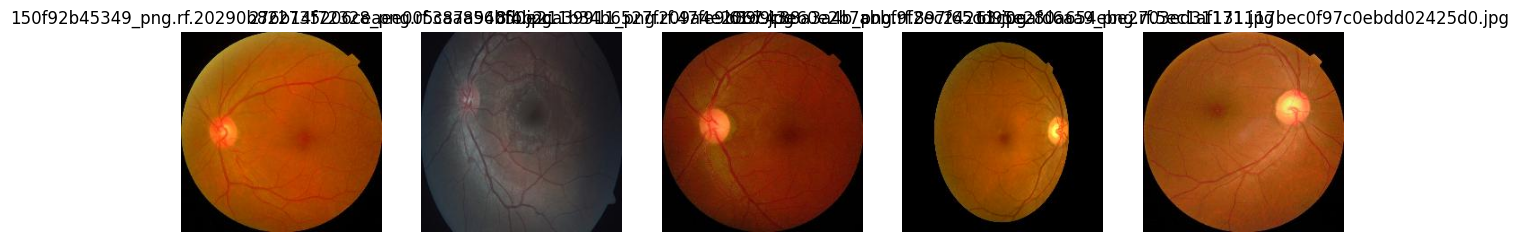

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Paths to the folders
diabetes_dr_folder = '/content/Diabetes/DR'
diabetes_no_dr_folder = '/content/Diabetes/No_DR'

# Function to display random images from a folder
def display_random_images(folder, num_images=5):
    images = os.listdir(folder)
    selected_images = random.sample(images, min(num_images, len(images)))

    # Display images
    plt.figure(figsize=(15, 15))
    for i, img_name in enumerate(selected_images):
        img_path = os.path.join(folder, img_name)
        img = mpimg.imread(img_path)

        plt.subplot(1, num_images, i+1)  # Adjust layout based on the number of images
        plt.imshow(img)
        plt.axis('off')
        plt.title(img_name)

    plt.show()

# Display 5 images from each folder
print("Displaying images from dr folder:")
display_random_images(diabetes_dr_folder, 5)

print("Displaying images from no_dr folder:")
display_random_images(diabetes_no_dr_folder, 5)


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Load the VGG16 model (without the top layer)
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Step 2: Create a model to extract features
# We take the output before the fully connected layers to get the feature maps
feature_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.layers[-1].output)

# Step 3: Extract features from training and validation data
# Extract features for training set
train_features = feature_extractor.predict(train_generator)
train_labels = train_generator.classes  # Get the corresponding labels

# Extract features for validation set
validation_features = feature_extractor.predict(validation_generator)
validation_labels = validation_generator.classes  # Get the corresponding labels

# Step 4: Flatten the features to feed them into the Random Forest
train_features_flat = train_features.reshape(train_features.shape[0], -1)
validation_features_flat = validation_features.reshape(validation_features.shape[0], -1)


52/52 ━━━━━━━━━━━━━━━━━━━━ 23s 424ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 451ms/step


In [ ]:
# Step 5: Train-test split (Optional: If you want to create a separate test set)
# X_train, X_test, y_train, y_test = train_test_split(train_features_flat, train_labels, test_size=0.2, random_state=42)

# Step 6: Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(train_features_flat, train_labels)

# Step 7: Evaluate the Random Forest model on validation data
y_pred = rf_model.predict(validation_features_flat)

# Step 8: Evaluation metrics
accuracy = accuracy_score(validation_labels, y_pred)
conf_matrix = confusion_matrix(validation_labels, y_pred)
class_report = classification_report(validation_labels, y_pred)

print(f"Random Forest Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Random Forest Accuracy: 0.5036144578313253
Confusion Matrix:
[[105 105]
 [101 104]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.50      0.50       210
           1       0.50      0.51      0.50       205

    accuracy                           0.50       415
   macro avg       0.50      0.50      0.50       415
weighted avg       0.50      0.50      0.50       415



In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

In [ ]:

# Define directories
base_dir = '/content/Diabetes'
train_dir = base_dir  # Assuming all your data is in this directory

# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values between 0 and 1
    shear_range=0.2,  # Apply random shearing transformations
    zoom_range=0.2,  # Apply random zooming
    horizontal_flip=True,  # Flip the image horizontally
    validation_split=0.2  # 80% for training, 20% for validation
)

In [ ]:
# Training generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # VGG16 requires 224x224 input size
    batch_size=32,
    class_mode='categorical',  # Multi-class classification
    subset='training'  # Use this subset for training
)


Found 1661 images belonging to 2 classes.


In [ ]:

# Validation generator
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # VGG16 requires 224x224 input size
    batch_size=32,
    class_mode='categorical',  # Multi-class classification
    subset='validation'  # Use this subset for validation
)


Found 415 images belonging to 2 classes.


In [ ]:
# Load the VGG16 model, excluding the top (fully connected layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional base so we don't train it
base_model.trainable = False

# Create the model by adding custom layers on top of VGG16
model = models.Sequential([
    base_model,  # VGG16 base
    layers.GlobalAveragePooling2D(),  # Replace Flatten with GlobalAveragePooling2D to avoid shape errors
    layers.Dense(256, activation='relu'),  # Add a dense layer with ReLU activation
    layers.Dropout(0.5),  # Dropout for regularization
    layers.Dense(train_generator.num_classes, activation='softmax')  # Output layer with softmax for multi-class classification
])


In [ ]:

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),  # Low learning rate for fine-tuning
              loss='categorical_crossentropy',  # Suitable for multi-class classification
              metrics=['accuracy'])

In [ ]:
try:
    model.build(input_shape=(None, 224, 224, 3))  # Explicitly build the model
    model.summary()  # Try the summary again after building
except ValueError as e:
    print(f"Error: {e}")

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,846,530 (56.64 MB)

 Trainable params: 131,842 (515.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Train the model (if the model builds successfully)
history = model.fit(
    train_generator,
    epochs=10,  # You can adjust the number of epochs
    validation_data=validation_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


51/51 ━━━━━━━━━━━━━━━━━━━━ 58s 767ms/step - accuracy: 0.5796 - loss: 0.7567 - val_accuracy: 0.8307 - val_loss: 0.6114
Epoch 2/10
 1/51 ━━━━━━━━━━━━━━━━━━━━ 6s 128ms/step - accuracy: 0.5625 - loss: 0.6437

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


51/51 ━━━━━━━━━━━━━━━━━━━━ 13s 266ms/step - accuracy: 0.5625 - loss: 0.6437 - val_accuracy: 0.8387 - val_loss: 0.5784
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 41s 500ms/step - accuracy: 0.6261 - loss: 0.6493 - val_accuracy: 0.8750 - val_loss: 0.5294
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5938 - loss: 0.7329 - val_accuracy: 0.8387 - val_loss: 0.5500
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 38s 471ms/step - accuracy: 0.7082 - loss: 0.5734 - val_accuracy: 0.8932 - val_loss: 0.4741
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7812 - loss: 0.5030 - val_accuracy: 0.8710 - val_loss: 0.5182
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 43s 511ms/step - accuracy: 0.8140 - loss: 0.4820 - val_accuracy: 0.8594 - val_loss: 0.4319
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.8438 - loss: 0.4296 - val_accuracy: 0.9355 - val_loss: 0.4323
Epoch 9/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 29s 486ms/step - accuracy: 0.8352 - loss: 0.4425 - val_accuracy: 0.8724 - val_

In [ ]:
from tensorflow.keras.applications import ResNet50
# Load the ResNet50 model, excluding the top (fully connected layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# Use GlobalAveragePooling2D instead of Flatten, as ResNet50 works well with this
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),  # Use GlobalAveragePooling instead of Flatten
    layers.Dense(256, activation='relu'),  # Fully connected layer
    layers.Dropout(0.5),  # Dropout for regularization
    layers.Dense(train_generator.num_classes, activation='softmax')  # Output layer for multi-class classification
])



94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),  # Low learning rate for fine-tuning
              loss='categorical_crossentropy',  # Suitable for multi-class classification
              metrics=['accuracy'])

# Ensure the model architecture is sound
try:
    model.build(input_shape=(None, 224, 224, 3))  # Explicitly build the model
    model.summary()  # Try the summary again after building
except ValueError as e:
    print(f"Error: {e}")


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,112,770 (91.98 MB)

 Trainable params: 24,059,650 (91.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
# Train the model (if the model builds successfully)
history = model.fit(
    train_generator,
    epochs=10,  # You can adjust the number of epochs
    validation_data=validation_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Save the model
model.save('/content/resnet50_diabetes_model.h5')

Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.8453 - loss: 0.3429 - val_accuracy: 0.4974 - val_loss: 0.7114
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.9375 - loss: 0.1920 - val_accuracy: 0.6129 - val_loss: 0.6590
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 65s 555ms/step - accuracy: 0.9700 - loss: 0.1224 - val_accuracy: 0.5833 - val_loss: 0.6696
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0205 - val_accuracy: 0.7419 - val_loss: 0.6644
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 32s 565ms/step - accuracy: 0.9715 - loss: 0.0907 - val_accuracy: 0.5000 - val_loss: 0.7742
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0285 - val_accuracy: 0.5806 - val_loss: 0.6937
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 30s 539ms/step - accuracy: 0.9710 - loss: 0.0824 - val_accuracy: 0.5052 - val_loss: 0.7801
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9688 - loss: 0.1283 - val_accuracy: 0.5161 

In [ ]:
# Creating cnn model
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(224,224,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(512,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(3,activation='softmax'))






model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224,224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 512)                 │       9,437,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,679,554 (36.92 MB)

 Trainable params: 9,679,554 (36.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10  # Adjust the number of epochs as needed
)

Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 42s 632ms/step - accuracy: 0.6731 - loss: 0.6243 - val_accuracy: 0.8359 - val_loss: 0.3755
Epoch 2/10
 1/51 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.7812 - loss: 0.3584

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.7812 - loss: 0.3584 - val_accuracy: 0.9355 - val_loss: 0.2184
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 64s 445ms/step - accuracy: 0.8368 - loss: 0.3730 - val_accuracy: 0.8568 - val_loss: 0.3135
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8125 - loss: 0.5829 - val_accuracy: 0.9677 - val_loss: 0.1454
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 41s 446ms/step - accuracy: 0.8793 - loss: 0.2999 - val_accuracy: 0.8672 - val_loss: 0.3359
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9062 - loss: 0.1476 - val_accuracy: 0.9032 - val_loss: 0.2677
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 41s 451ms/step - accuracy: 0.8970 - loss: 0.2860 - val_accuracy: 0.8984 - val_loss: 0.2670
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8125 - loss: 0.3639 - val_accuracy: 0.9032 - val_loss: 0.1861
Epoch 9/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 40s 423ms/step - accuracy: 0.9187 - loss: 0.2363 - val_accuracy: 0.9349 - val_lo

In [ ]:
# Evaluate the model on the validation data or test data
loss, accuracy = model.evaluate(validation_generator)

# Print the accuracy
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 424ms/step - accuracy: 0.9176 - loss: 0.2151
Validation Accuracy: 92.05%


In [ ]:
# Visualize training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

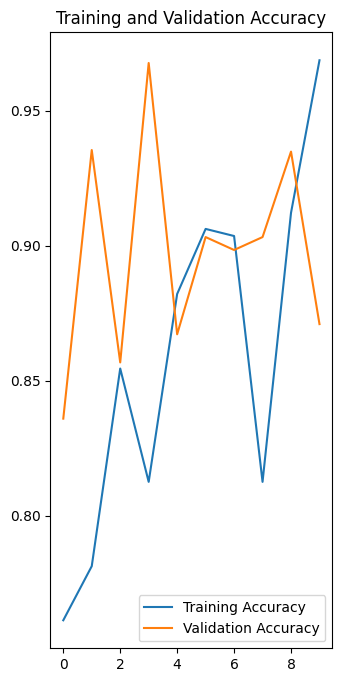

In [ ]:
epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

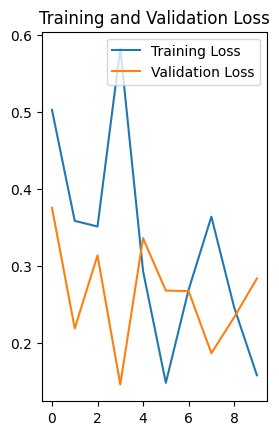

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Define parameters
sequence_length = 10  # Number of frames in each sequence
img_height, img_width = 224, 224  # Image size
num_classes = 2  # Adjust based on your classification task

# CNN model
def create_cnn_model(input_shape):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Flatten())
    return model

# Create CNN model
cnn_model = create_cnn_model((img_height, img_width, 3))

# Input shape for the entire model
input_shape = (sequence_length, img_height, img_width, 3)

# LSTM model
model = models.Sequential()
model.add(layers.TimeDistributed(cnn_model, input_shape=input_shape))  # Apply CNN to each time step
model.add(layers.LSTM(64, return_sequences=False))  # LSTM layer
model.add(layers.Dense(num_classes, activation='softmax'))  # Output layer

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ time_distributed (TimeDistributed)   │ (None, 10, 86528)           │          93,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 64)                  │      22,167,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,261,186 (84.92 MB)

 Trainable params: 22,261,186 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Define parameters
sequence_length = 10  # Number of frames in each sequence
img_height, img_width = 224, 224  # Image size
num_classes = 2  # Adjust based on your classification task

# CNN model
def create_cnn_model(input_shape):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Flatten())
    return model

# Create CNN model
cnn_model = create_cnn_model((img_height, img_width, 3))

# Input shape for the entire model
input_shape = (sequence_length, img_height, img_width, 3)

# LSTM model
model = models.Sequential()
model.add(layers.TimeDistributed(cnn_model, input_shape=input_shape))  # Apply CNN to each time step
model.add(layers.LSTM(64, return_sequences=False))  # LSTM layer
model.add(layers.Dense(num_classes, activation='softmax'))  # Output layer

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Generate random data (replace this with your actual data loading mechanism)
num_samples = 100  # Adjust as needed
X = np.random.rand(num_samples, sequence_length, img_height, img_width, 3)  # Random data
y = np.random.randint(0, num_classes, size=(num_samples, 1))  # Random labels
y = tf.keras.utils.to_categorical(y, num_classes)  # One-hot encode the labels

# Train the model with a validation split
history = model.fit(X, y, epochs=10, batch_size=16, validation_split=0.2)

# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(X[int(num_samples * 0.8):], y[int(num_samples * 0.8):], batch_size=16)  # Use the last 20% as validation
print(f'Validation Loss: {val_loss:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')





Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 609ms/step - accuracy: 0.4679 - loss: 1.2959 - val_accuracy: 0.4000 - val_loss: 0.7623
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 336ms/step - accuracy: 0.5026 - loss: 0.7174 - val_accuracy: 0.4000 - val_loss: 0.7632
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 337ms/step - accuracy: 0.4696 - loss: 0.7257 - val_accuracy: 0.4000 - val_loss: 0.7179
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 355ms/step - accuracy: 0.5278 - loss: 0.6898 - val_accuracy: 0.4000 - val_loss: 0.7028
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 337ms/step - accuracy: 0.4979 - loss: 0.6932 - val_accuracy: 0.6000 - val_loss: 0.6922
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 336ms/step - accuracy: 0.5668 - loss: 0.6919 - val_accuracy: 0.6000 - val_loss: 0.6864
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 338ms/step - accuracy: 0.4497 - loss: 0.6947 - val_accuracy: 0.6000 - val_loss: 0.6898
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 338ms/step - accuracy: 0.4970 - loss: 0.6911 - val_accuracy: 0.6000 - val_loss:

In [ ]:
!pip install PyWavelets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 42.9 MB/s eta 0:00:00


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 590ms/step - accuracy: 0.4250 - loss: 0.7011 - val_accuracy: 0.3125 - val_loss: 0.7281
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5521 - loss: 0.6896 - val_accuracy: 0.6875 - val_loss: 0.6873
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.4271 - loss: 0.6972 - val_accuracy: 0.3125 - val_loss: 0.7102
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5667 - loss: 0.6895 - val_accuracy: 0.3125 - val_loss: 0.7372
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5604 - loss: 0.6845 - val_accuracy: 0.3125 - val_loss: 0.7208
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5083 - loss: 0.6954 - val_accuracy: 0.3125 - val_loss: 0.7018
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5583 - loss: 0.6916 - val_accuracy: 0.3125 - val_loss: 0.6996
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5146 - loss: 0.6882 - val_accuracy: 0.3125 - val_los

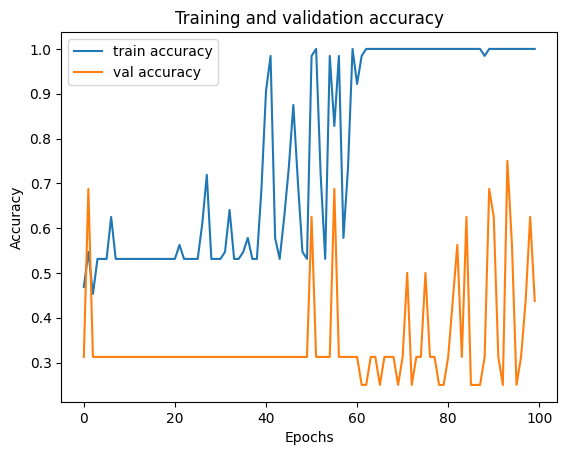

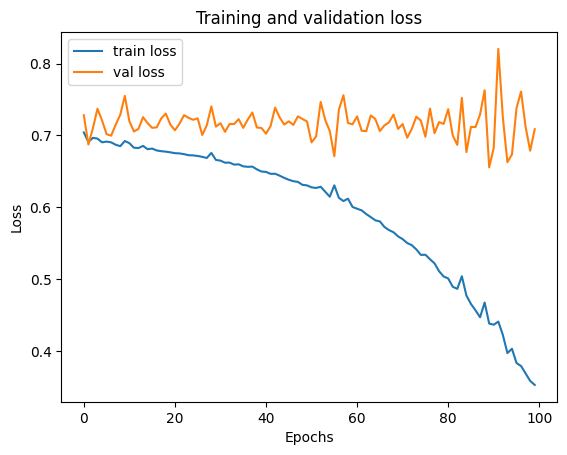

In [ ]:
import numpy as np
import pywt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Function to apply DWT to an image and return low-frequency component
def apply_dwt(image):
    coeffs2 = pywt.dwt2(image, 'haar')
    LL, (LH, HL, HH) = coeffs2  # LL is the low-frequency component
    return LL

# Example of applying DWT to all images in a batch
def apply_dwt_to_batch(X):
    dwt_images = []
    for i in range(X.shape[0]):
        img_dwt = apply_dwt(X[i, :, :, 0])  # Apply DWT on the first channel (grayscale or first channel of RGB)
        dwt_images.append(img_dwt)
    dwt_images = np.array(dwt_images)
    return dwt_images

# CNN model
def create_cnn_model(input_shape):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(2, activation='softmax'))  # Adjust for the number of classes
    return model

# Load and preprocess your dataset
# Replace with actual data loading mechanism, this is just a simulation of image data

# Simulate random image data (e.g., 100 images of 128x128 size)
num_samples = 100  # Adjust as needed
img_height, img_width = 128, 128  # Image dimensions
X = np.random.rand(num_samples, img_height, img_width, 1)  # Grayscale images (single channel)
y = np.random.randint(0, 2, size=(num_samples, 1))  # Random binary labels (adjust for your task)
y = tf.keras.utils.to_categorical(y, 2)  # One-hot encode the labels (for binary classification)

# Apply DWT to all images in the dataset
X_dwt = apply_dwt_to_batch(X)

# Reshape DWT output to match CNN input shape
X_dwt = X_dwt.reshape(X_dwt.shape[0], X_dwt.shape[1], X_dwt.shape[2], 1)  # Adding the channel dimension

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_dwt, y, test_size=0.2, random_state=42)

# Create the CNN model
cnn_model = create_cnn_model((X_train.shape[1], X_train.shape[2], 1))

# Compile the model
cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
history = cnn_model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test, batch_size=16)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Plotting accuracy and loss over epochs
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Found 1661 images belonging to 2 classes.
Found 415 images belonging to 2 classes.
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 56s 596ms/step - accuracy: 0.5427 - loss: 2.5187 - val_accuracy: 0.8479 - val_loss: 0.4344
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.7502 - loss: 0.8786 - val_accuracy: 0.8859 - val_loss: 0.3366
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8332 - loss: 0.5066 - val_accuracy: 0.9150 - val_loss: 0.2835
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8634 - loss: 0.3927 - val_accuracy: 0.9172 - val_loss: 0.2568
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8666 - loss: 0.3616 - val_accuracy: 0.9195 - val_loss: 0.2339
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8844 - loss: 0.3098 - val_accuracy: 0.9329 - val_loss: 0.2179
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9165 - loss: 0.2155 - val_accuracy: 

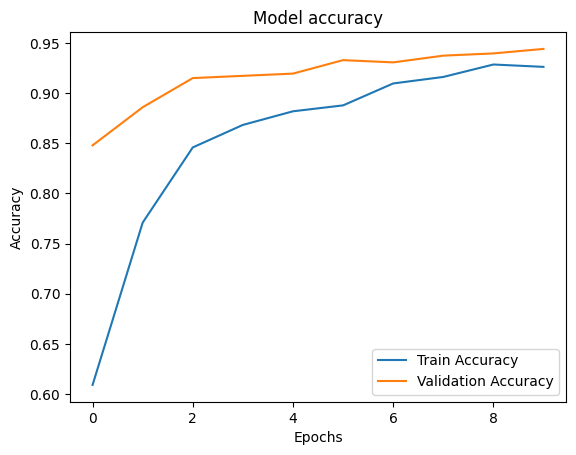

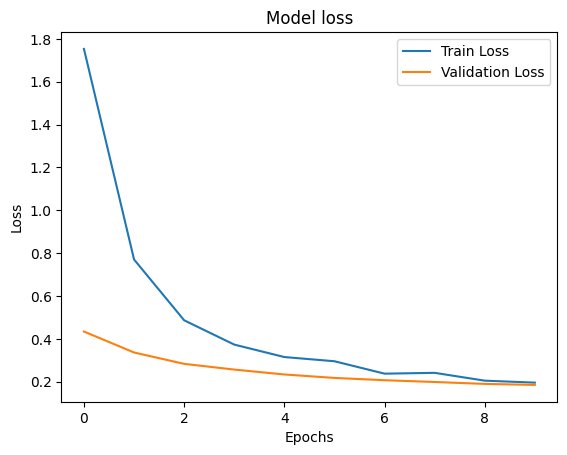

In [ ]:
import numpy as np
import pywt  # Ensure pywt is installed for wavelet transform
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import DenseNet121  # Using DenseNet121 as the base model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define parameters
img_height, img_width = 128, 128  # Image size
num_classes = 2  # Adjust based on your classification task

# Load your data (use your own data loading mechanism)
# You can use ImageDataGenerator to load images from directories
data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = data_gen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_gen = data_gen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Function to apply DWT to images
def apply_dwt(image):
    coeffs = pywt.dwt2(image, 'haar')  # Use Haar wavelet
    LL, (LH, HL, HH) = coeffs  # Extract DWT coefficients
    return LL  # Return only the low-frequency component (LL)

# DWT Preprocessing step
def preprocess_with_dwt(generator):
    X_dwt = []
    y = []
    for X_batch, y_batch in generator:
        batch_size = X_batch.shape[0]
        X_batch_dwt = np.zeros((batch_size, img_height // 2, img_width // 2, 3))  # DWT reduces size by half
        for i in range(batch_size):
            for j in range(3):  # For RGB channels
                X_batch_dwt[i, :, :, j] = apply_dwt(X_batch[i, :, :, j])
        X_dwt.append(X_batch_dwt)
        y.append(y_batch)
        if len(X_dwt) * batch_size >= generator.n:  # Stop when we processed all images
            break
    return np.vstack(X_dwt), np.vstack(y)

# Apply DWT to the training and validation data
X_train, y_train = preprocess_with_dwt(train_gen)
X_val, y_val = preprocess_with_dwt(val_gen)

# Pre-trained DenseNet model for feature extraction
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(img_height // 2, img_width // 2, 3))

# Freeze the pre-trained layers to avoid training them
for layer in base_model.layers:
    layer.trainable = False

# CNN + DWT Model using DenseNet
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())  # DenseNet works well with global average pooling
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))  # Dropout to prevent overfitting
model.add(layers.Dense(num_classes, activation='softmax'))  # Output layer

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {val_loss:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')

# Plot training & validation accuracy and loss
def plot_history(history):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Call the plot function to visualize the training process
plot_history(history)
